In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# The path where the data is located
path = '/content/gdrive/My Drive/ColabNotebooks/ECE 612/project 3'

In [3]:
import keras
import os
import pickle
from keras.models import Sequential
from keras.utils import np_utils
from tensorflow import keras
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [4]:
X = open(os.path.join(path,'project3trainset.pkl'),'rb')
X = pickle.load(X)
y = open(os.path.join(path,'project3trainlabel.pkl'),'rb')
y = pickle.load(y)
X.shape, y.shape

((55000, 28, 28), (55000,))

In [17]:
xtrain , xtest ,ytrain, ytest = train_test_split(X,y,test_size =0.2,shuffle = True,random_state = 15)
ytrain_bak = ytrain
ytest_bak = ytest
xtrain.shape , xtest.shape ,ytrain.shape, ytest.shape

((44000, 28, 28), (11000, 28, 28), (44000,), (11000,))

In [18]:
classes = 10
ytrain = np_utils.to_categorical(ytrain,classes)
ytest = np_utils.to_categorical(ytest,classes)
ytrain.shape, ytest.shape

((44000, 10), (11000, 10))

In [7]:
img_size = xtrain.shape[1]
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(img_size, (3,3), padding='same', input_shape=(img_size, img_size, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(img_size, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 activation (Activation)     (None, 28, 28, 28)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7

In [8]:
model.compile(loss='categorical_crossentropy',
        optimizer=keras.optimizers.RMSprop(),
        metrics=['accuracy'])

os.chdir(path)

history = model.fit(xtrain, ytrain, batch_size=64 , epochs = 200,
          validation_data=(xtest,ytest),
          callbacks= [EarlyStopping(patience = 15,verbose = 1, mode = 'auto'), 
                      ModelCheckpoint(filepath = 'murat.h5',save_best_only = True,verbose=1)],
          verbose=1, shuffle=True)

Epoch 1/200
688/688 [==============================] - ETA: 0s - loss: 1.0803 - accuracy: 0.6186
Epoch 1: val_loss improved from inf to 0.61330, saving model to murat.h5
688/688 [==============================] - 22s 12ms/step - loss: 1.0803 - accuracy: 0.6186 - val_loss: 0.6133 - val_accuracy: 0.7753
Epoch 2/200
686/688 [============================>.] - ETA: 0s - loss: 0.6448 - accuracy: 0.7612
Epoch 2: val_loss improved from 0.61330 to 0.50431, saving model to murat.h5
688/688 [==============================] - 8s 12ms/step - loss: 0.6447 - accuracy: 0.7612 - val_loss: 0.5043 - val_accuracy: 0.8120
Epoch 3/200
688/688 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.7897
Epoch 3: val_loss improved from 0.50431 to 0.48519, saving model to murat.h5
688/688 [==============================] - 9s 13ms/step - loss: 0.5711 - accuracy: 0.7897 - val_loss: 0.4852 - val_accuracy: 0.8205
Epoch 4/200
683/688 [============================>.] - ETA: 0s - loss: 0.5304 - accur

In [19]:
model.load_weights('murat.h5')
print("Training Acuracy:", model.evaluate(xtrain, ytrain, verbose=0)[1])
print("Test Accuracy", model.evaluate(xtest, ytest, verbose=0)[1])

Training Acuracy: 0.9073408842086792
Test Accuracy 0.8782727122306824


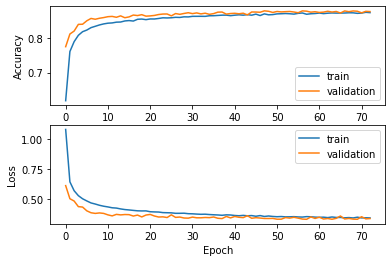

In [10]:
import os
path = '/content/gdrive/My Drive/ColabNotebooks/ECE 612/project 3'

import matplotlib.pyplot as plt
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='lower right')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])    
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper right')  

#plt.savefig('learning_curves_v2',format='png',dpi=1000)
#plt.show()  

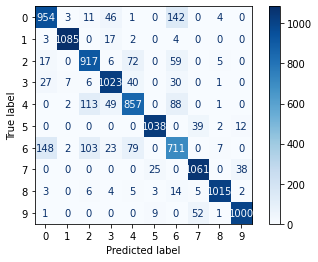

In [20]:
#"""**Loading and testing the model performance**"""
labels = [0,1,2,3,4,5,6,7,8,9]
model_name = 'murat.h5'
model_path = os.path.join(path, model_name)
model.load_weights(model_path)
predicts = model.predict(xtest)
ypred = np.argmax(predicts, axis = 1)
cm = confusion_matrix(ytest_bak, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)